# **Loan-Prediction Case Study**


## **Importing necessary packages and data**

Importing neccessary Packages

In [1]:
# Packages used
# !pip install numpy==1.19.0 pandas==1.1.0 scikit-learn==0.23.2 seaborn==0.10.1 yellowbrick==1.1 category_encoders==2.2.2  xgboost==1.2.0

In [2]:
import warnings                                                     # To ignore any warnings
warnings.filterwarnings("ignore")

import numpy as np                                                  # To perform numerical operations on vectors/arrays.
import pandas as pd                                                 # To store and manupulate dataset
import matplotlib.pyplot as plt                                     # To visualize data
import seaborn as sns                                               # To visualize data
from yellowbrick.target import FeatureCorrelation                   # To plot correlation bar chart
from sklearn.model_selection import train_test_split                # To split data to train and test set
from sklearn.preprocessing import  OrdinalEncoder                   # To encode data
from category_encoders import TargetEncoder                         # To encode data
from sklearn.impute import SimpleImputer                            # To impute data
from sklearn.pipeline import Pipeline                               # To build preprocessing and prediction pipeline
from sklearn.compose import ColumnTransformer                       # To apply different tranformation on different columns parallely
from sklearn.base import BaseEstimator, TransformerMixin            # For creating custom estimator
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score                          # Evalution metric that we will be using
from sklearn.model_selection import GridSearchCV, cross_val_score   # To select a descent model

from string import ascii_uppercase                                  # To get alphabetical labels

np.random.seed(42)                                                  # To have same random values on each run.
%matplotlib inline

**Reading the train data**

In [3]:
data = pd.read_csv('https://raw.githubusercontent.com/rahul96rajan/sample_datasets/master/loan_status.csv')
data.sample(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
350,LP002139,Male,Yes,0,Graduate,No,9083,0.0,228.0,360.0,1.0,Semiurban,Y
377,LP002223,Male,Yes,0,Graduate,No,4310,0.0,130.0,360.0,NaN,Semiurban,Y
163,LP001570,Male,Yes,2,Graduate,No,4167,1447.0,158.0,360.0,1.0,Rural,Y
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
132,LP001478,Male,No,0,Graduate,No,2718,0.0,70.0,360.0,1.0,Semiurban,Y
578,LP002877,Male,Yes,1,Graduate,No,1782,2232.0,107.0,360.0,1.0,Rural,Y
316,LP002035,Male,Yes,2,Graduate,No,3717,0.0,120.0,360.0,1.0,Semiurban,Y
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
340,LP002115,Male,Yes,3+,Not Graduate,No,2647,1587.0,173.0,360.0,1.0,Rural,N
77,LP001259,Male,Yes,1,Graduate,Yes,1000,3022.0,110.0,360.0,1.0,Urban,N


**Reading the test data**

In [4]:
X = data.drop(['Loan_ID','Loan_Status'], axis=1)
y = data['Loan_Status']

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=42, stratify=y)

In [6]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(491, 11) (491,)
(123, 11) (123,)


**Understanding the Data**

In this section, we will look at the structure of the train and test datasets. Firstly, we will check the features present in our data and then we will look at their data types.


In [7]:
X_train.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

We have 12 independent variables and 1 target variable, i.e. Loan_Status in the train dataset.

We will predict the Loan_Status using the model built using the train data.

### Given below is the description for each variable.

##### **Variable	Description** 

* **Loan_ID**:	Unique Loan ID
* **Gender**:	Male/ Female
* **Married**:	Applicant married (Y/N)
* **Dependents**:	Number of dependents
* **Education**:	Applicant Education (Graduate/Under Graduate)
* **Self_Employed**:	Self employed (Y/N)
* **ApplicantIncome**:	Applicant income
* **CoapplicantIncome**:	Coapplicant income
* **LoanAmount**:	Loan amount in thousands
* **Loan_Amount_Term**:	Term of loan in months
* **Credit_History**:	Credit history meets guidelines
* **Property_Area**:	Urban/ Semi Urban/ Rural
* **Loan_Status**:	Loan approved (Y/N)


In [8]:
# Print data types for each variable
X_train.dtypes

Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
dtype: object

In [9]:
categorical_features = ['Gender', 'Married', 'Dependents', 'Credit_History',
                        'Self_Employed' , 'Property_Area', 'Education']
numerical_features = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
                      'Loan_Amount_Term'] 

# Eye-rolling over DataFrame sample you could obseverve tha 'Credit_History'
# is actually a categorical value.

Let’s look at the shape of the dataset.

### Checking whether there exists null values

In [10]:
X_train.isna().sum()

Gender               11
Married               3
Dependents            8
Education             0
Self_Employed        27
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           20
Loan_Amount_Term     12
Credit_History       43
Property_Area         0
dtype: int64

So, we have null values in our dataset and will have to impute them. We'll do that based upond decision made during **Univariate Analysis**.

## **Univariate Analysis:**

In this section, we will do univariate analysis. It is the simplest form of analyzing data where we examine each variable individually.

For categorical features we can use frequency table or bar plots which will calculate the number of each category in a particular variable. 

For numerical features, probability density plots can be used to look at the distribution of the variable.

### Visualizing Target Variable

We will first look at the target variable, i.e., **Loan_Status**. 

As it is a categorical variable, let us look at its frequency table, percentage distribution and bar plot.

Frequency table of a variable will give us the count of each category in that variable.


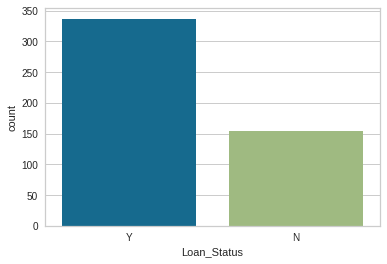

In [11]:
sns.countplot(y_train)

*So our datasets is **unbalanced** and have a Yes:No ratio as 2:1 (approx)*

### Visualizing categorical features


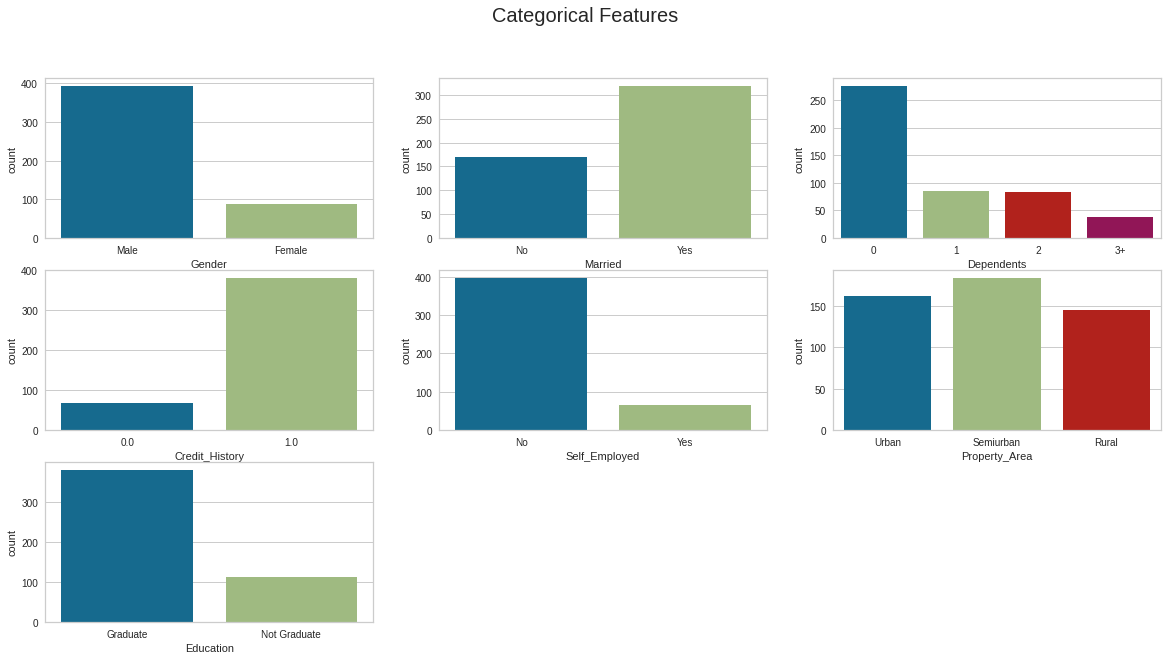

In [12]:
fig = plt.figure(figsize=(20, 10))

for i,x in enumerate(categorical_features):
    plt.subplot(3, 3, i+1)
    sns.countplot(X_train[x])

plt.suptitle("Categorical Features", fontsize=20)
plt.show()


It can be inferred from the above bar plots that:
* Majority loan applicants in the dataset are male.
* Around 65% of the applicants in the dataset are married.
* Ratio of aplicants with dependents and without is roughly 7:5
* Around 80% of the applicants hold a graduate degree.
* Only about 15% applicants in the dataset are self employed.
* Among applicants distribution of people living in urban, semi-urban and rural is pretty much similar.
* Around 85% applicants have repaid their debts.


### Visualizing numerical features

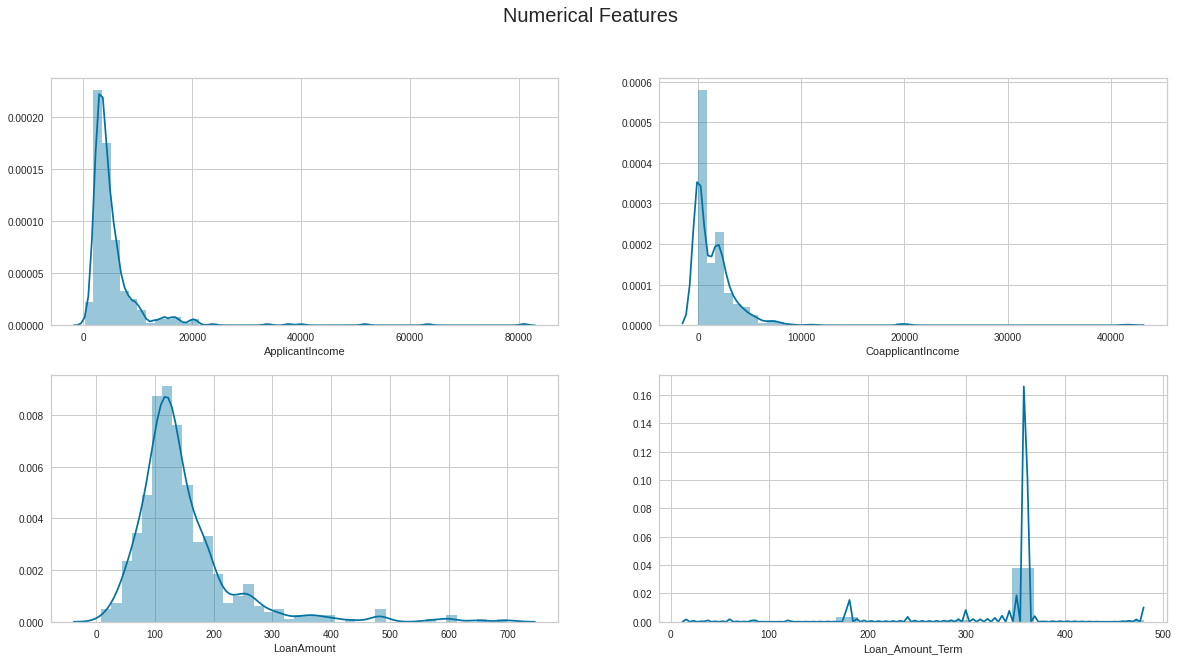

In [13]:
fig = plt.figure(figsize=(20, 10))

for i,x in enumerate(numerical_features):
    plt.subplot(2, 2, i+1)
    sns.distplot(X_train[x])

plt.suptitle("Numerical Features", fontsize=20)
plt.show()

It can be seen that in the distributions of **'ApplicantIncome', 'CoapplicantIncome' and 'LoanAmount'** graph is normal distribution skewed towards right. And in case of **Loan_Amount_Term** we see a high concentration around 350 months.

As algorithms works better if the data is normally distributed, we will either cap this or cut the data into bins(i.e; making numerical to categorical)

Lets recall some of the hypotheses that we generated earlier:

•	Applicants with high income should have more chances of loan approval.

•	Applicants who have repaid their previous debts should have higher chances of loan approval.

•	Loan approval should also depend on the loan amount. If the loan amount is less, chances of loan approval should be high.

•	Lesser the amount to be paid monthly to repay the loan, higher the chances of loan approval.

Lets try to test the above mentioned hypotheses using bivariate analysis

After looking at every variable individually in univariate analysis, we will now explore them again with respect to the target variable.


## **Bivariate analysis with respect to output(Loan_Status)**

### Categorical Features

Text(0.5, 0.98, 'Categorical Features')

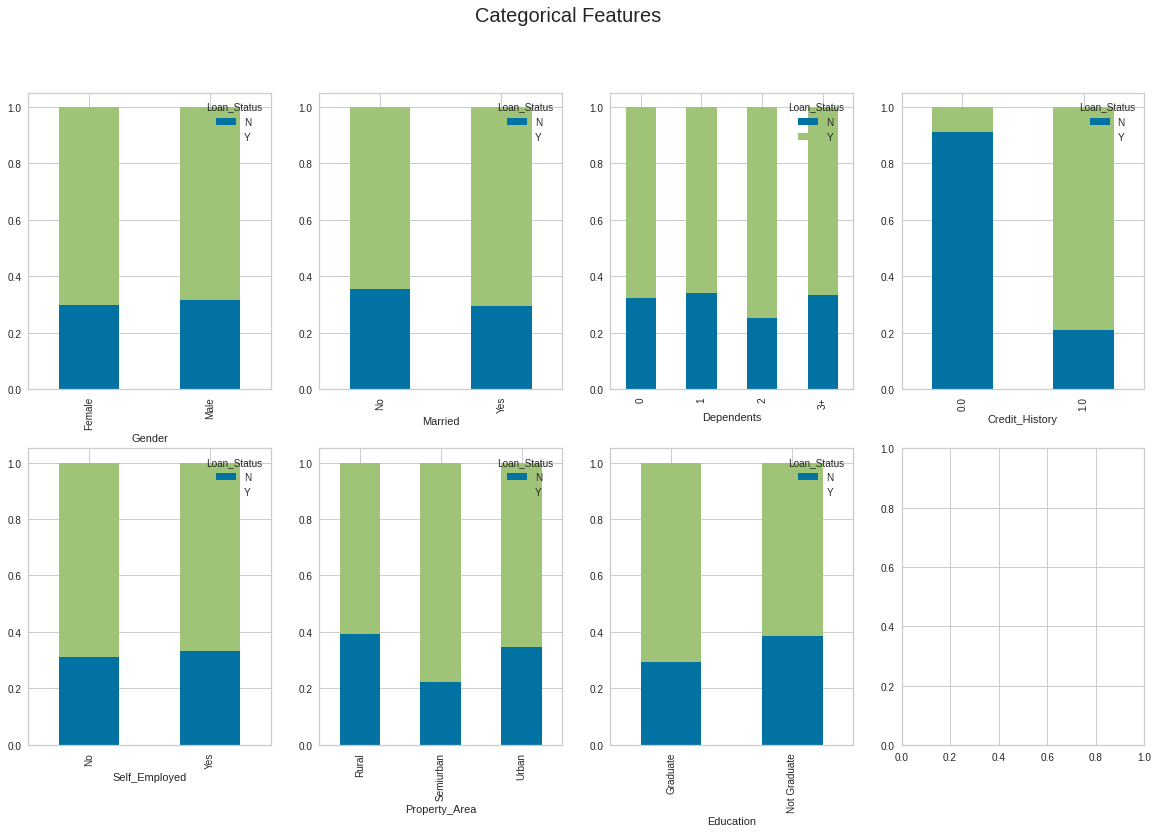

In [14]:
fig, axes = plt.subplots(nrows=2, ncols=4)
fig.set_figheight(12)
fig.set_figwidth(20)

i=0

for j,x in enumerate(categorical_features):
    if j>3:
        i=1; j-=4
    _crs_tab = pd.crosstab(X_train[x].dropna(), y_train)
    _crs_tab.div(_crs_tab.sum(1).astype(float), axis=0).plot(kind="bar",
                                                             stacked=True,
                                                             ax=axes[i,j])

plt.suptitle("Categorical Features", fontsize=20)

* It seems people with credit history as 1 are more likely to get their loans approved.
* For all other features approval distribution amongst various classes is more or less the same. 

### Numerical Features

For the ease of visualization and further in preprocessing to handle outliear we will cut the continous varianble into ordinal bins.

In [15]:
print(numerical_features)

['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']


In [16]:
#list of binned numerical feature vectors 
binned_nums = []

## ApplicantIncome ##
AIbins = [0, 1000, 2000, 3000, 4000, 6000, 8000, 15000, 20000, 40000, 81000]
binned_nums.append(pd.cut(X_train['ApplicantIncome'], bins=AIbins,
                          labels=list(ascii_uppercase[0:10])))

## CoapplicantIncome ##
CIbins = [0, 500, 1000, 2000, 3000, 4000, 5000, 8000, 12000, 20000, 50000]
binned_nums.append(pd.cut(X_train['CoapplicantIncome'], bins=CIbins,
                          labels=list(ascii_uppercase[0:10])))

## LoanAmount ##
LAbins = [0, 50, 100, 200, 500, 1000]
LAlabels = ['very_small_sum', 'small_sum', 'moderate_sum',
            'large_sum', 'very_large_sum']
binned_nums.append(pd.cut(X_train['LoanAmount'], bins=LAbins, labels=LAlabels))


## Loan_Amount_Term ##
LATbins = [0, 60, 360, 600]
LATlabels = ['short_term', 'moderate_term', 'long_term']
binned_nums.append(pd.cut(X_train['Loan_Amount_Term'], bins=LATbins,
                          labels=LATlabels))

Text(0.5, 0.98, 'Numerical Features (Binned)')

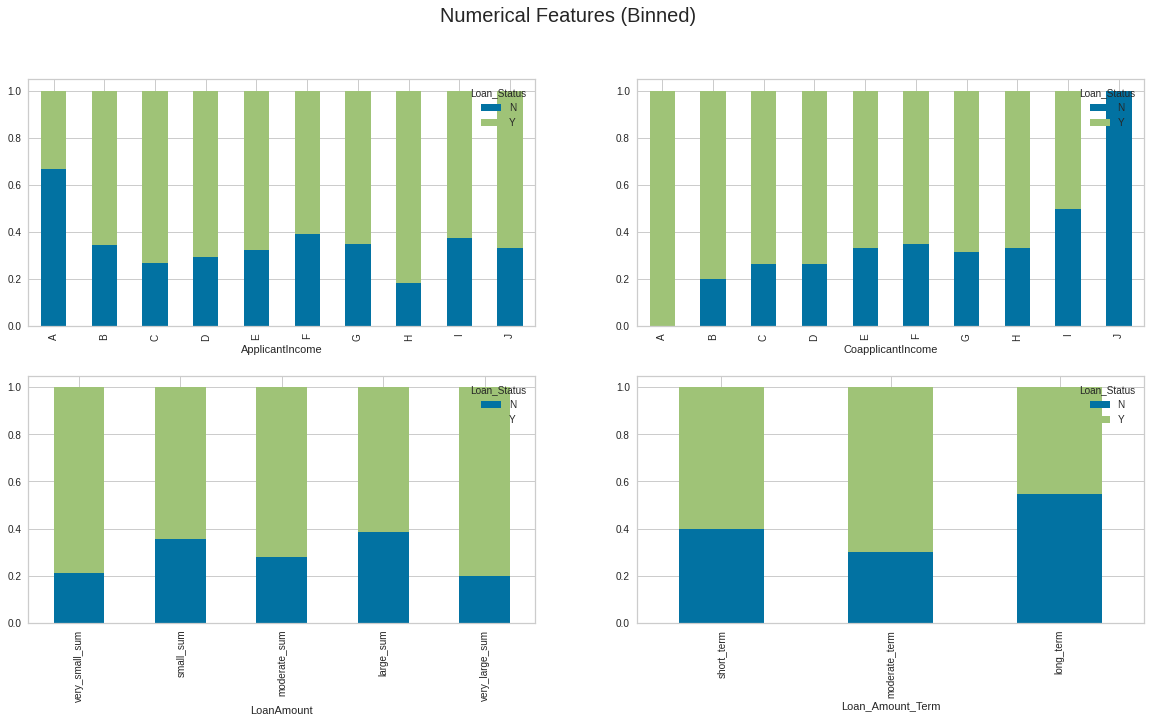

In [17]:
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(20)

i=0

for j,x in enumerate(binned_nums):
    
    if j>1:
        i=1; j-=2
    _crs_tab = pd.crosstab(x.dropna(), y_train)
    _crs_tab.div(_crs_tab.sum(1).astype(float), axis=0).plot(kind="bar",
                                                             stacked=True,
                                                             ax=axes[i,j])

plt.suptitle("Numerical Features (Binned)", fontsize=20)

#### From the graphs we can conclude:

We don't see any clear relation between Applicant income and loan approval but on ther hand we can clearly see a relation coapplicant income and loan amount which is having a lower income co-applicant reaises odds of geeting loan approved. And surety of approval when Co-Applicant Income is very low.
> This is strange. Let's get value counts of **'Coapplicant_Income'**

In [18]:
X_train['CoapplicantIncome'].value_counts(sort=True)

0.0       223
2083.0      5
1666.0      5
2500.0      4
2333.0      3
         ... 
1915.0      1
2232.0      1
913.0       1
1668.0      1
2254.0      1
Name: CoapplicantIncome, Length: 232, dtype: int64

>The reason we were observing 100% loan approval at very low coapplicant income was because a significant number of applicant do not have a coapplicant at all.

>That makes sense. What we can do is that, we could make a new feature **'Overall_Income'** which would be addition of **'Applicant Income'** and **'Coapplicant Income'**. 

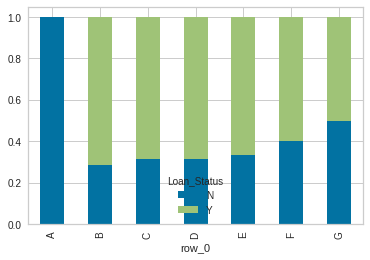

In [19]:
Overall_Income = X_train['CoapplicantIncome'] + X_train['ApplicantIncome']

OIbins = [0, 2000, 4000, 8000, 16000, 30000, 60000, 100000]
OI_trans = pd.cut(Overall_Income, bins=OIbins,
                          labels=list(ascii_uppercase[0:7]))
_crs_tab = pd.crosstab(OI_trans.dropna(), y_train)
_crs_tab.div(_crs_tab.sum(1).astype(float), axis=0).plot(kind="bar",
                                                         stacked=True)


In [20]:
corr_matrix = X_train.corr()
corr_matrix

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.130215,0.602661,-0.045426,-0.045082
CoapplicantIncome,-0.130215,1.000000,0.215280,-0.100915,-0.005889
LoanAmount,0.602661,0.215280,1.000000,0.026364,0.000363
Loan_Amount_Term,-0.045426,-0.100915,0.026364,1.000000,0.055825
Credit_History,-0.045082,-0.005889,0.000363,0.055825,1.000000


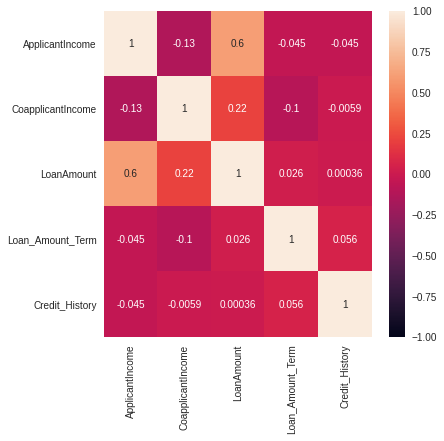

In [21]:
plt.figure(figsize=(6,6))
sns.heatmap(corr_matrix, annot=True, vmin=-1)

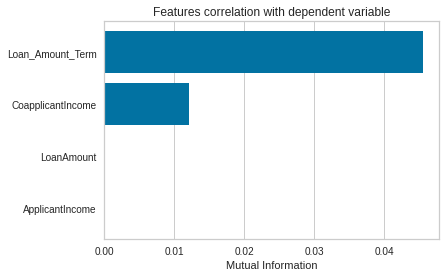

In [22]:
_temp_X_train = X_train[numerical_features].dropna()
_temp_y_train = y_train[_temp_X_train.index]

vis_pearson = FeatureCorrelation(labels=numerical_features,
                                 method='mutual_info-classification', sort=True)
vis_pearson.fit(_temp_X_train, _temp_y_train)
vis_pearson.poof()



**Mutual information** is a measure between two (possibly multi-dimensional) random variables and , that quantifies the amount of information obtained about one random variable, through the other random variable.

>mutual_info-classification method returns 0 if no correlation and non-zero otherwise.

So, we can remove feature **LoanAmount** and **ApplicantIncome**. Similar inference could also be from the divided bar blot that we earlier plotted.

## **Pre-Processing (Handling null-values and outliers)**

Based upon the insights we got form univariate and bi-variate anlysis we are going process oour data.

Actions/Steps to be performed:
1. Impute Categorical values based on **most_frequent** (mode) value. Using *SimpleImputer* estimator.
2. Impute Numercal values based on **median**.  Using *SimpleImputer* estimator.
3. Cut numerical values to bins. *We will create a **custom estimator** for this step*.
4. Apply *target_encoder* on nominal features.
5. Apply *OrdinalEncoder* on ordinal features.

In [23]:
# TO-DO
class Nums2Cats(BaseEstimator, TransformerMixin):
    """
    A custom class used to pre-process loan dataset.

    Methods
    -------
    fit(X, y=None)
        Effectively nothing performed in fitting
    transform(X)
        Transforms the given dataframe in to dataframe such that numerical
        features:
            - 'ApplicantIncome' and 'LoanAmount' are dropped
            - 'CoapplicantIncome' and 'Loan_Amount_Term' are converted into
               ordinal categorical values.
    """
    def __init__(self):
        pass
    def fit(self, X, y=None):
        return self # nothing else to do
    def transform(self, X):
        """
        This method transforms 'CoapplicantIncome' and 'Loan_Amount_Term' are
        converts into ordinal categorical values.
        And drops 'ApplicantIncome' and 'LoanAmount'.

        Parameters
        ----------
        X : pandas.DataFrame
            The dataframe on which processing is needed to be performed.

        Returns
        -------
        pandas.DataFrame
            a processed DataFrame.
        """
        
        # These steps are exactly the same as the one we did above in
        # bivariate visualization with respect to outcome(y_train). 
        # The only difference is that here we use 
        # numpy.digitize() instead of pandas.cut()
        # Please consider going through the documentation of numpy.digitize()
             
        AI_ix, CI_ix, LA_ix, LAT_ix = 0, 1, 2, 3

        ## CoapplicantIncome ##
        CIbins = [500, 1000, 2000, 3000, 4000, 5000, 8000, 12000, 20000]
        CI_cat = np.digitize( (X[:, CI_ix]), bins=CIbins)    


        ## Loan_Amount_Term ##
        LATbins = [60, 360]
        LAT_cat = np.digitize(X[:, LAT_ix], bins=LATbins)

        return np.c_[CI_cat, LAT_cat]

In [24]:
mode_imp = SimpleImputer(strategy='most_frequent')
median_imp = SimpleImputer(strategy='median')
num2cats = Nums2Cats()

cat_pipe = Pipeline(steps=[('mode_imp', mode_imp)])
num_pipe = Pipeline(steps=[('median_imp', median_imp), ('num2cats', num2cats)])
col_trans_lv1 = ColumnTransformer([('cat_pipe', cat_pipe, categorical_features),
                                   ('num_pipe', num_pipe, numerical_features)])

In [25]:
numerical_features

['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']

In [26]:
# Testing lvl 1 transformation
test_lvl1 = col_trans_lv1.fit_transform(X_train)  #TO-DO beautify
print(test_lvl1[:5])

[['Male' 'No' '0' 1.0 'No' 'Urban' 'Graduate' 0 2]
 ['Male' 'Yes' '1' 1.0 'No' 'Semiurban' 'Graduate' 0 2]
 ['Male' 'Yes' '2' 0.0 'No' 'Rural' 'Graduate' 2 2]
 ['Male' 'Yes' '1' 0.0 'No' 'Rural' 'Not Graduate' 2 1]
 ['Male' 'Yes' '0' 1.0 'No' 'Semiurban' 'Graduate' 3 2]]


In [27]:
"""To replicate transformations from Num2Cats, for visualizing the tranformation
being made to the numpy array"""

numerical_features_updated = ['CoapplicantIncome', 'Loan_Amount_Term']

print(':: Indices of features after column-transform-lvl1 ::')
dict(enumerate(categorical_features+numerical_features_updated))

:: Indices of features after column-transform-lvl1 ::


{0: 'Gender',
 1: 'Married',
 2: 'Dependents',
 3: 'Credit_History',
 4: 'Self_Employed',
 5: 'Property_Area',
 6: 'Education',
 7: 'CoapplicantIncome',
 8: 'Loan_Amount_Term'}

Now that we have imputed numerical and categorical fetures and converted numerical features into ordinal categorical features.

Let's now **target_encode** nominal features and **OrdinalEncode** ordinal features 

After **col_trans_lvl1** transformation we will get a numpy.ndarray.

>From our list of feature ordinal feature will be  ***'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Education', 'Dependents'*** out of this except for ***'Education', 'Dependents'*** are already ordinally encoded (thanks to numpy.digitizer).

> And we have nominal features, ***'Gender', 'Married', 'Credit_History', 'Self_Employed', 'Property_Area'***. We will target_encode these features.

In [28]:
ordinal_feat_ix = [2, 6]             # 'Dependents', 'Education'

nominal_feat_ix = [0, 1, 3, 4, 5]    # 'Gender', 'Married', 'Credit_History',
                                     # 'Self_Employed', 'Property_Area'

In [29]:
targ_enc = TargetEncoder()
ord_enc = OrdinalEncoder()

col_trans_lv2 = ColumnTransformer([('targ_enc', TargetEncoder(), nominal_feat_ix),
                                   ('ord_enc', OrdinalEncoder(), ordinal_feat_ix)],
                                  remainder='passthrough')

In [30]:
pre_process_pipe = Pipeline([('col_trans_lvl1', col_trans_lv1),
                             ('col_trans_lvl2', col_trans_lv2)])

## **Model Building and Predictions**
Approach : 
1. We will firt build a base model(logistic regression) and get a base accuracy from the model.
2. Then we will build several complex models and judge them basing the base model.
3. We will pick the most promising model and then fine tune its hyper-parameter.

### Base Model (Logistic Regression)

In [31]:
y_train = y_train.replace(['Y', 'N'], [1, 0])   # replacing Y=1 and N=0

X_train_processed = pre_process_pipe.fit_transform(X_train, y_train)

In [32]:
base_model = LogisticRegression()
base_model.fit(X_train_processed, y_train)

LogisticRegression()

Let’s predict the Loan_Status for validation set and calculate its accuracy.

In [33]:
train_prediction = base_model.predict(X_train_processed)

base_accuracy_train = round(accuracy_score(y_train, train_prediction)*100, 2)
base_accuracy_cv = round(np.mean(cross_val_score(base_model, X_train_processed,
                                                 y_train, scoring='accuracy',
                                                 cv=10, n_jobs=-1))*100, 2)
print(':: Base Accuracy :: \nTrain :: {0} \nCV :: {1}'.format(base_accuracy_train,
                                                              base_accuracy_cv))

:: Base Accuracy :: 
Train :: 69.04 
CV :: 68.43


**We will take these as our base accuracy now, that is our next model must give atleast this much accuracy.**

### Model Selection

We will build the following models using our processed dataset and check how it perform with base model.

* Logistic Regression
* Decision Tree
* Random Forest
* XGBoost
* Multi-layer Perceptron
* KNN
* Naive-Bayes Classifier
* SVM

In [34]:
dtc = DecisionTreeClassifier(random_state=42)
rfc = RandomForestClassifier(random_state=42, n_jobs=-1)
mlpc = MLPClassifier(random_state=42)
knn = KNeighborsClassifier(n_jobs=-1)
gnb = GaussianNB()
svc = SVC(random_state=42)
xgb = XGBClassifier(n_jobs=-1)

classifiers = [dtc, rfc, mlpc, knn, gnb, svc, xgb]
train_accuracies = dict()
cv_accuracies = dict()

In [35]:
for clf in classifiers:
    clf.fit(X_train_processed, y_train)
    y_train_pred = clf.predict(X_train_processed)
    train_accuracies[type(clf).__name__] = round(accuracy_score(y_train_pred,
                                                                y_train)*100, 2)
    cv_accuracies[type(clf).__name__] = round(np.mean(cross_val_score(clf,
                                        X_train_processed, y_train,
                                        scoring='accuracy',
                                        cv=20, n_jobs=-1))*100, 2)

In [36]:
pd.DataFrame([train_accuracies, cv_accuracies], index=['Train', 'CV'])

,DecisionTreeClassifier,RandomForestClassifier,MLPClassifier,KNeighborsClassifier,GaussianNB,SVC,XGBClassifier
Train,89.00,89.00,69.86,79.63,80.24,69.04,87.58
CV,67.77,75.16,65.38,72.91,79.85,68.65,73.75


### Model tuning (GaussainNB)

From the above DataFrame we can see that **Gaussian Naive-Bayes** gives the best performance out of all models on default parameters.
Also a 11.42 % accuracy from the base model.

> Decision Tree and XGBClassifier are having a better accuracy on training set but quite low on CV set, which indicates models are overfittin training data.

We will use GridSearchCV for hyper parameter tuning

In [37]:
# GaussianNB have very few hyperparameter to tune.
params = { 'var_smoothing': [1e-30, 1e-20, 1e-10, 1] }

grdsrch_clf = GridSearchCV(gnb, params, cv=20)
grdsrch_clf.fit(X_train_processed, y_train)

GridSearchCV(cv=20, estimator=GaussianNB(),
             param_grid={'var_smoothing': [1e-30, 1e-20, 1e-10, 1]})

In [38]:
print("Best Score CV :: {0} \n"
      "Best Estimator :: {1}".format(grdsrch_clf.best_score_,
                                     grdsrch_clf.best_estimator_))

Best Score CV :: 0.7985 
Best Estimator :: GaussianNB(var_smoothing=1e-30)


## **Prediction**
As, now we have our best estimator. Lets evaluate our model on test set.

In [39]:
# First we have to pre-process the data
X_test_processed = pre_process_pipe.transform(X_test)

# As we trained on outcomes as [0,1] output values will be also in [0,1]
y_test = y_test.replace(['Y', 'N'], [1, 0])

y_pred_test = grdsrch_clf.predict(X_test_processed)
test_accuracy = round(accuracy_score(y_test, y_pred_test), 2)
print('Accuracy of our model :: ', test_accuracy)

Accuracy of our model ::  0.85


Thank You.